# Yulu Case Study

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

## Business Problem:
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.graphics.gofplots  import qqplot

In [2]:
data = pd.read_csv("C:\\Users\\ARYAN\\OneDrive\\Documents\\My Repository\\Datasources\\yulu.txt")

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.shape

(10886, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### The data has 10886 rows and 12 features(out of which 8 are of type "int64", 3 are of "float64" and 1 is of "object" type).

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### The data has no missing values.

In [8]:
np.round(data["season"].value_counts(normalize = True)*100 , 2)

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64

In [9]:
np.round(data.groupby("season")[["count"]].mean().reset_index(), 2).sort_values(by = "count", ascending = False)

,season,count
2,3,234.42
1,2,215.25
3,4,198.99
0,1,116.34


#### Fall season has the highest average number of electric cycles(234.42), Summer season(215.25), Winter season(198.99) and Spring season(116.34).

In [10]:
np.round(data["weather"].value_counts(normalize = True)*100 , 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

In [11]:
np.round(data.groupby("weather")[["count"]].mean().reset_index(), 2)

,weather,count
0,1,205.24
1,2,178.96
2,3,118.85
3,4,164.00


#### Weather1 has the highest average number of electric cycles(205.24) followed by Weather2(178.96), Weather3(118.85) and Weather4(164.00).

In [12]:
np.round(data["workingday"].value_counts(normalize = True)*100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [13]:
np.round(data.groupby("workingday")[["count"]].mean().reset_index(), 2)

,workingday,count
0,0,188.51
1,1,193.01


#### Average number of cycles rented on working days is 193.01 while on non-working days is 188.51.

In [14]:
np.round(data["holiday"].value_counts(normalize = True)*100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [15]:
np.round(data.groupby("holiday")[["count"]].mean().reset_index(), 2)

,holiday,count
0,0,191.74
1,1,185.88


In [16]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [17]:
data.insert(2, "month", data["datetime"].dt.strftime("%B"))

In [18]:
data.insert(3, "time", data["datetime"].dt.time)

In [19]:
data.head()

,datetime,season,month,time,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,January,00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,January,01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,January,02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,January,03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,January,04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
np.round(data.groupby("month")[["count"]].mean().reset_index(), 2).sort_values(by = "count", ascending = False)

,month,count
6,June,242.03
5,July,235.33
1,August,234.12
11,September,233.81
10,October,227.70
8,May,219.46
9,November,193.68
0,April,184.16
2,December,175.61
7,March,148.17


#### The month of June has the highest average number of electric cycles(242.03) followed by July(235.33) and August(234.12).

In [21]:
np.round(data.groupby("time")[["count"]].mean().reset_index(), 2).sort_values(by = "count", ascending = False)

,time,count
17,17:00:00,468.77
18,18:00:00,430.86
8,08:00:00,362.77
16,16:00:00,316.37
19,19:00:00,315.28
13,13:00:00,257.79
12,12:00:00,256.51
15,15:00:00,254.30
14,14:00:00,243.44
20,20:00:00,228.52


#### Most average number of electric cycles are rented at 5 PM(468.77) followed by 6 PM(430.86) followed by 8 AM(362.77).

## Univariate Analysis

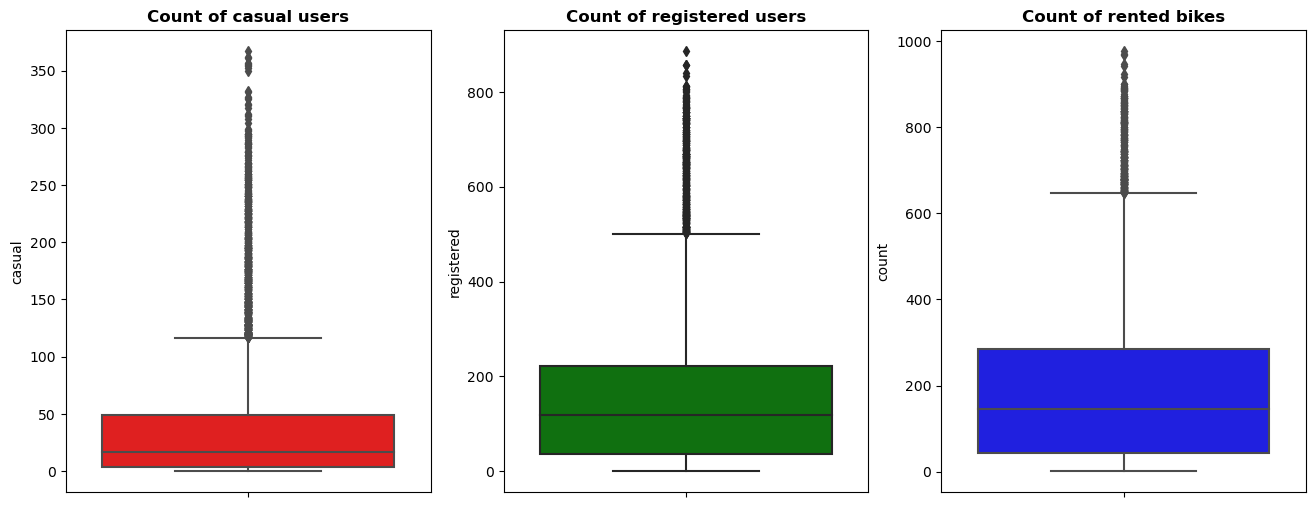

In [22]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))
sns.boxplot(data = data, y = "casual", ax = axs[0], color = "red").set_title("Count of casual users", fontweight = "bold")
sns.boxplot(data = data, y = "registered", ax = axs[1], color = "green").set_title("Count of registered users", fontweight = "bold")
sns.boxplot(data = data, y = "count", ax = axs[2], color = "blue").set_title("Count of rented bikes", fontweight = "bold")
plt.show()

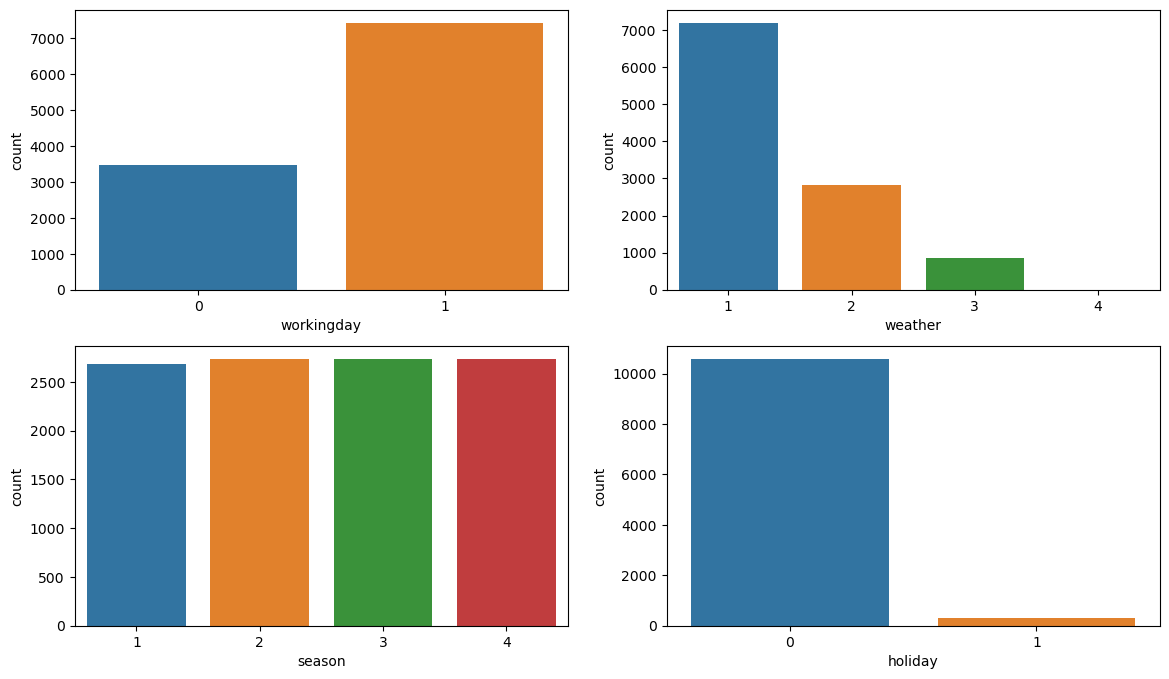

In [23]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,8))
sns.countplot(x = data["workingday"], ax = axs[0][0])
sns.countplot(x = data["weather"], ax = axs[0][1])
sns.countplot(x = data["season"], ax = axs[1][0])
sns.countplot(x = data["holiday"], ax = axs[1][1])
plt.show()

## Bi-variate analysis

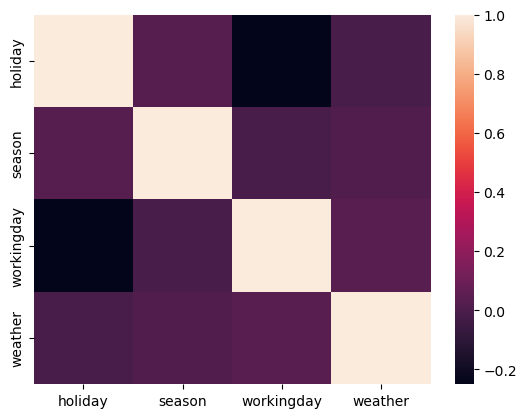

In [24]:
sns.heatmap(data[["holiday", "season", "workingday", "weather"]].corr())
plt.show()

#### The heatmap above shows no correlation between holiday, season, workingday and weather.

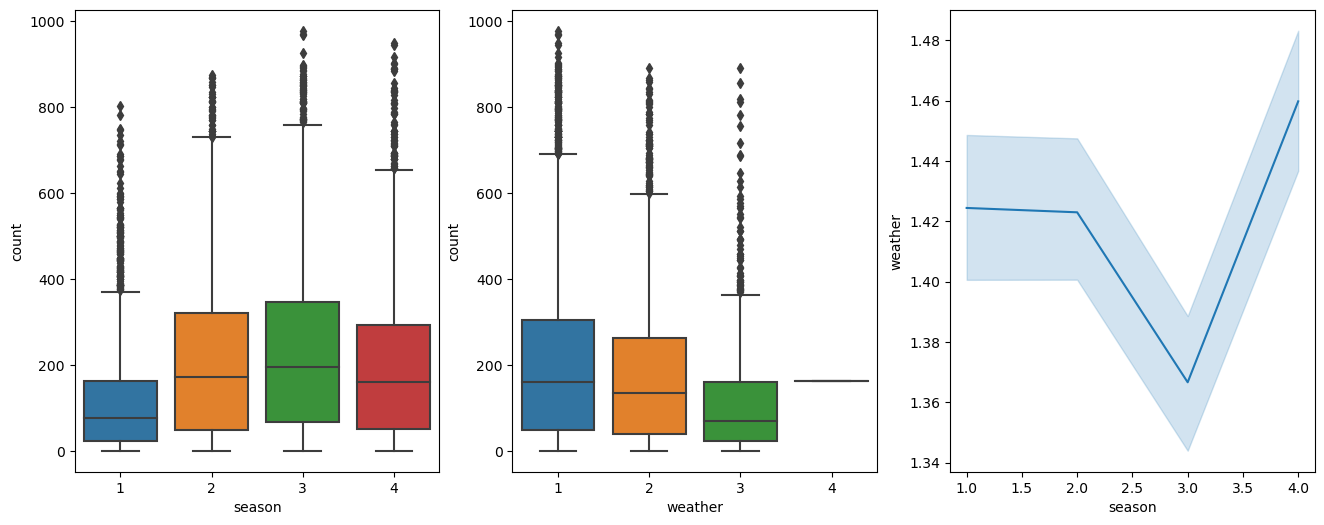

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))
sns.boxplot(data = data, x = "season", y = "count", ax = axs[0])
sns.boxplot(data = data, x = "weather", y = "count", ax = axs[1])
sns.lineplot(x = data["season"], y = data["weather"], ax = axs[2])
plt.show()

## Insights after Initial Exploration:
- The data has 10886 rows and 12 features(out of which 8 are of type "int64", 3 are of "float64" and 1 is of "object" type).
- The data has no missing values.
- The data has 66.06% occurences of weather condition 1, 26.03% occurences of weather condition 2, 7.89% occurences of weather condition 3 and just a single record of weather condition 4.
- Weather1 has the highest average number of electric cycles(205.24) followed by Weather2(178.96), Weather3(118.85) and Weather4(164.00).
- The data has 68.08% of working days and 31.91% of non-working days.
- Average number of cycles rented on working days is 193.01 while on non-working days is 188.51.
- The data has 25.11% occurences of season4, 25.10% occurences of season 2, 25.10% occurences of season 3 and 24.67% occurences of season 1.
- The month of June has the highest average number of electric cycles(242.03) followed by July(235.33) and August(234.12).
- Fall season has the highest average number of electric cycles(234.42), Summer season(215.25), Winter season(198.99) and Spring season(116.34).
- Most average number of electric cycles are rented at 5 PM(468.77) followed by 6 PM(430.86) followed by 8 AM(362.77).
- There are a number of outliers in number of casual users, registered users and the number of rented electric cycles.
- There is no correlation between between holiday, season, workingday and weather.
- Season and weather has a lot of outliers out of which spring among season and weather3 among weather has the maxmimum of outliers.

## Working Day V/s No. of electric cycles rented

In [26]:
data.groupby("workingday")["count"].mean().round()

workingday
0    189.0
1    193.0
Name: count, dtype: float64

In [27]:
work = data[data["workingday"] == 1]
no_work = data[data["workingday"] == 0]

In [28]:
work.head()

,datetime,season,month,time,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,January,00:00:00,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,January,01:00:00,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,January,04:00:00,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,January,05:00:00,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,January,06:00:00,0,1,1,5.74,5.305,50,26.0027,0,30,30


In [29]:
no_work.head()

,datetime,season,month,time,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,January,00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,January,01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,January,02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,January,03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,January,04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1


### Checking the population data for normality

#### Null Hypothesis(H0): Distribution of the sample is not significantly different from a normal distribution

#### Alternate Hypothesis(Ha): Distribution of the sample is significantly different from a normal distribution

#### Keeping Significance Level = 5%

In [30]:
alpha = 0.05
stat, p_val = shapiro(data["count"])
print("P-Value: ", p_val)
if p_val < alpha:
    print("Reject Null Hypothesis", "Distribution of the sample is significantly different from a normal distribution.", sep = "\n")
else :
    print("Reject Alternate Hypothesis", "Distribution of the sample is not significantly different from a normal distribution.", sep = "\n")

P-Value:  0.0
Reject Null Hypothesis
Distribution of the sample is significantly different from a normal distribution.


C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Inference: Distribution of the sample is significantly different from a normal distribution.

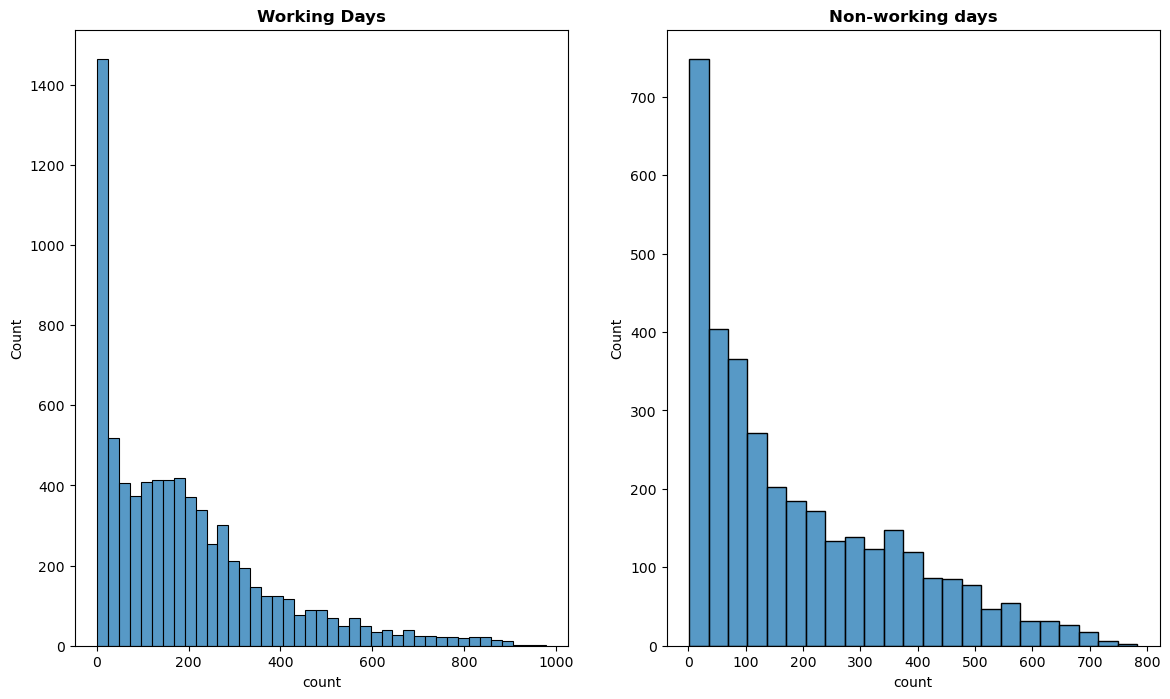

In [31]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14,8))
sns.histplot(work["count"], ax = axs[0]).set_title("Working Days", fontweight = "bold")
sns.histplot(no_work["count"], ax = axs[1]).set_title("Non-working days", fontweight = "bold")
plt.show()

In [32]:
sam_work = []
for i in range(1000):
    a = work["count"].sample(300).mean()
    sam_work.append(a)

In [33]:
sam_no_work = []
for i in range(1000):
    a = no_work["count"].sample(300).mean()
    sam_no_work.append(a)

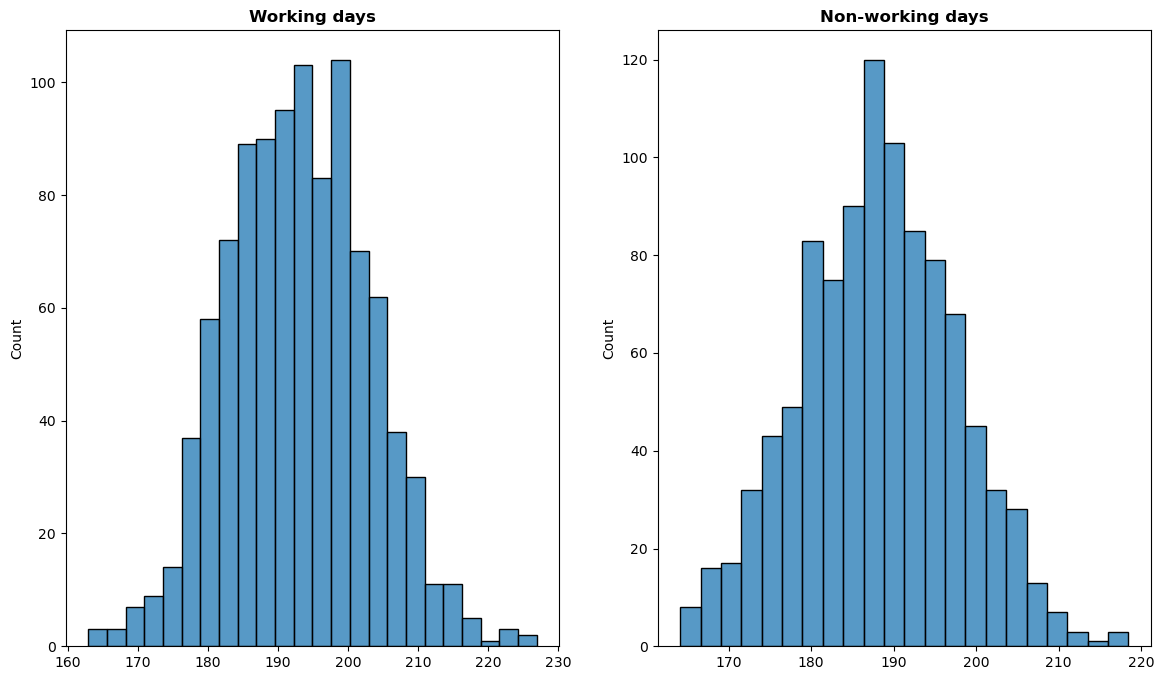

In [34]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14,8))
sns.histplot(sam_work, ax = axs[0]).set_title("Working days", fontweight = "bold")
sns.histplot(sam_no_work, ax = axs[1]).set_title("Non-working days", fontweight = "bold")
plt.show()

### Testing the samples for homogeinity in variance

#### Null Hypothesis(H0): The variances are not significantly different

#### Alternate Hypothesis(H0): The variances are significantly different

#### Keeping Significance level = 5%

In [35]:
alpha = 0.05
stat, p_val = levene(sam_work, sam_no_work)
print("P-Value: ",np.round(p_val, 3))
if p_val < alpha:
    print("Reject Null Hypothesis", "The variances are significantly different", sep = "\n")
else:
    print("Failed to reject Null Hypothesis", "The variances are not significantly different", sep = "\n")

P-Value:  0.033
Reject Null Hypothesis
The variances are significantly different


### Inference: The variances are significantly different

#### Assumptions:
- Data collected on working days is independent of data collected on non-working days.
- Population data is normal(But, here we have taken sample size greater than 30).
- The samples defined are random.
- There is homogeneity of variance(Here, the variances are not exactly same).

#### Null Hypothesis(H0): Working Day has no effect on number of electric cycles rented
#### Alternate Hypothesis(Ha): Working Day has effect on number of electric cycles rented
#### Keeping Significance level = 5%

In [36]:
alpha = 0.05
t_stat, p_val = ttest_ind(work["count"], no_work["count"])
print("T-stat: ", t_stat)
print("P-value: ", p_val)
if p_val < alpha:
    print("Reject Null Hypothesis")
    
else :
    print("Can't reject Null Hypothesis")

T-stat:  1.2096277376026694
P-value:  0.22644804226361348
Can't reject Null Hypothesis


### Inference: Working Day has no significant effect on number of electric cycles rented

## Seasons V/s No. of electric cycles rented

In [37]:
data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [38]:
season1 = data[data["season"] == 1]["count"]
season2 = data[data["season"] == 2]["count"]
season3 = data[data["season"] == 3]["count"]
season4 = data[data["season"] == 4]["count"]

In [39]:
season1.mean(), season2.mean(), season3.mean(), season4.mean()

(116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374)

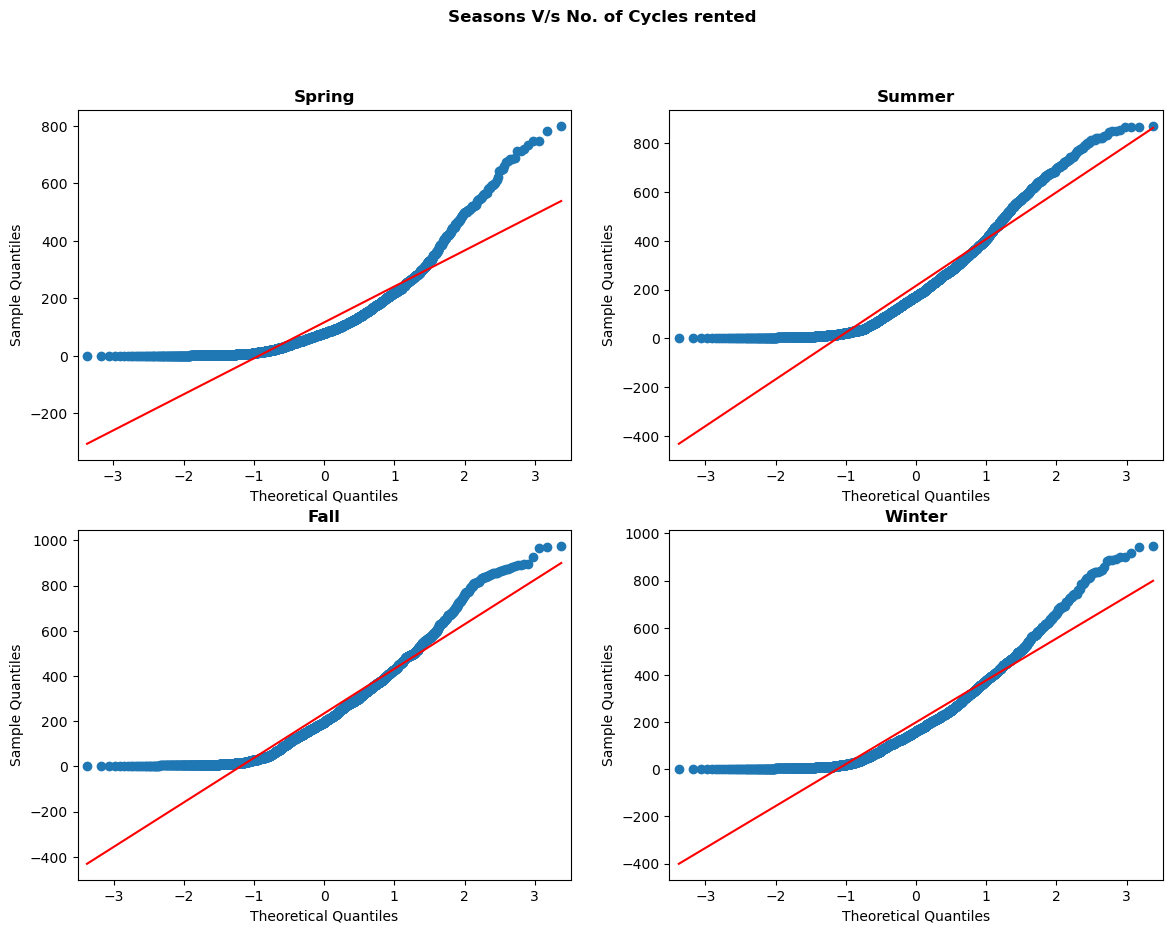

In [40]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
qqplot(season1, line = 's', ax = axs[0][0])
axs[0][0].set_title("Spring", fontweight = "bold")
qqplot(season2, line = 's', ax = axs[0][1])
axs[0][1].set_title("Summer", fontweight = "bold")
qqplot(season3, line = 's', ax = axs[1][0])
axs[1][0].set_title("Fall", fontweight = "bold")
qqplot(season4, line = 's', ax = axs[1][1])
axs[1][1].set_title("Winter", fontweight = "bold")
plt.suptitle("Seasons V/s No. of Cycles rented", fontweight = "bold")
plt.show()

In [41]:
spring = []
for i in range(1000):
    a = season1.sample(300).mean()
    spring.append(a)

In [42]:
summer = []
for i in range(1000):
    a = season2.sample(300).mean()
    summer.append(a)

In [43]:
fall = []
for i in range(1000):
    a = season3.sample(300).mean()
    fall.append(a)

In [44]:
winter = []
for i in range(1000):
    a = season4.sample(300).mean()
    winter.append(a)

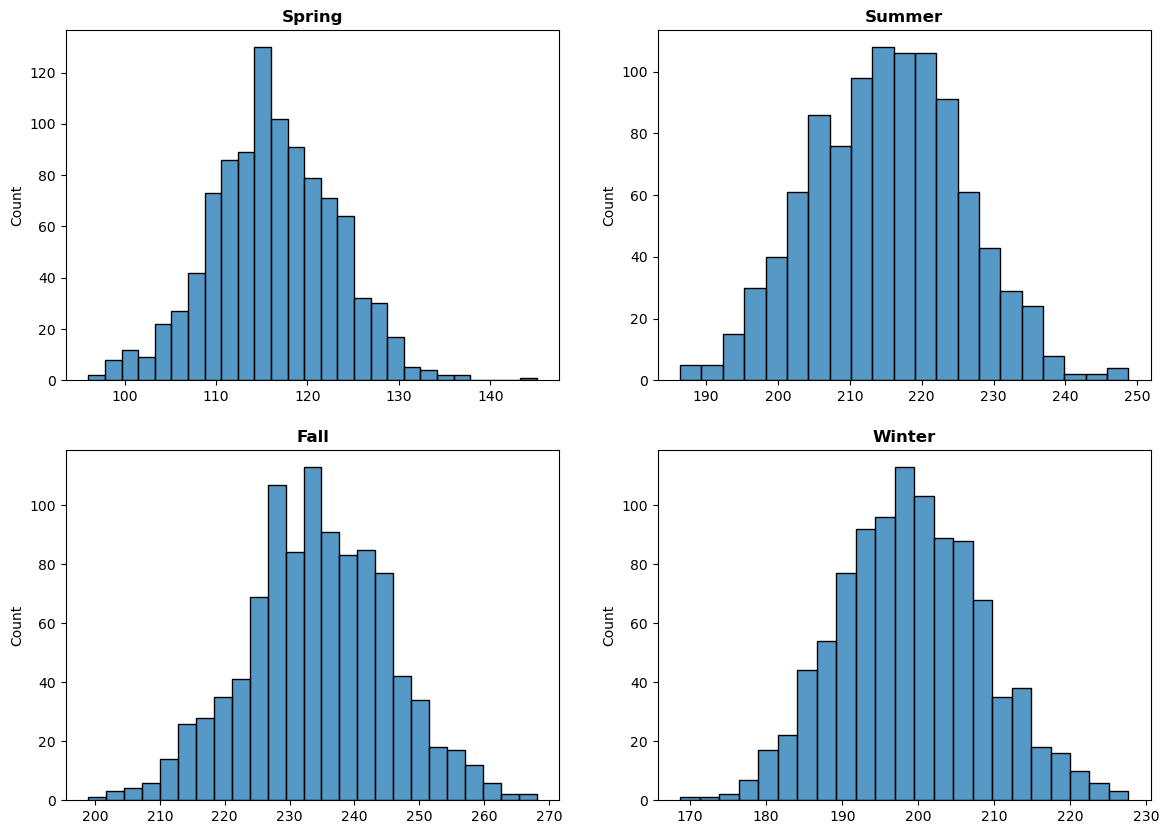

In [45]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
sns.histplot(spring, ax = axs[0][0]).set_title("Spring", fontweight = "bold")
sns.histplot(summer, ax = axs[0][1]).set_title("Summer", fontweight = "bold")
sns.histplot(fall, ax = axs[1][0]).set_title("Fall", fontweight = "bold")
sns.histplot(winter, ax = axs[1][1]).set_title("Winter", fontweight = "bold")
plt.show()

### Testing for homogeinity between samples

#### Null Hypothesis(H0): Working Day has no effect on number of electric cycles rented

#### Alternate Hypothesis(Ha): Working Day has effect on number of electric cycles rented

#### Keeping Significance level = 5%

In [46]:
alpha = 0.05
stat, p_val = levene(spring, summer, fall, winter)
print("P-Value: ",np.round(p_val, 3))
if p_val < alpha:
    print("Reject Null Hypothesis", "The variances are significantly different", sep = "\n")
else:
    print("Failed to reject Null Hypothesis", "The variances are not significantly different", sep = "\n")

P-Value:  0.0
Reject Null Hypothesis
The variances are significantly different


### Inference: The variances are significantly different

#### Assumptions:
- Data collected in different seasons is independent from each other.
- Population data is normal(We have used a sample size greater than 30).
- There is homogeneity of variance(Here, the variances are not exactly same but there is a little difference).

#### Null Hypothesis(H0): Seasons have no significant effect on number of electric cycles rented
#### Alternate Hypothesis(Ha): Seasons have a significant effect on number of electric cycles rented
#### Keeping Significance level = 5%

In [47]:
alpha = 0.05
stat, p_val = f_oneway(spring, summer, fall, winter)
print("T-stat: ", np.round(t_stat, 2))
print("P-value: ", np.round(p_val, 2))
if p_val < alpha:
    print("Reject Null Hypothesis")
    
else :
    print("Can't reject Null Hypothesis")

T-stat:  1.21
P-value:  0.0
Reject Null Hypothesis


### Inference: Seasons have a significant effect on number of electric cycles rented

## Weather V/s No. of  electric cycles rented

In [48]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

#### Weather 4 has just one record

In [49]:
weather1 = data[data["weather"] == 1]["count"]
weather2 = data[data["weather"] == 2]["count"]
weather3 = data[data["weather"] == 3]["count"]
weather4 = data[data["weather"] == 4]["count"]

In [50]:
weather1.mean(), weather2.mean(), weather3.mean(), weather4.mean()

(205.23679087875416, 178.95553987297106, 118.84633294528521, 164.0)

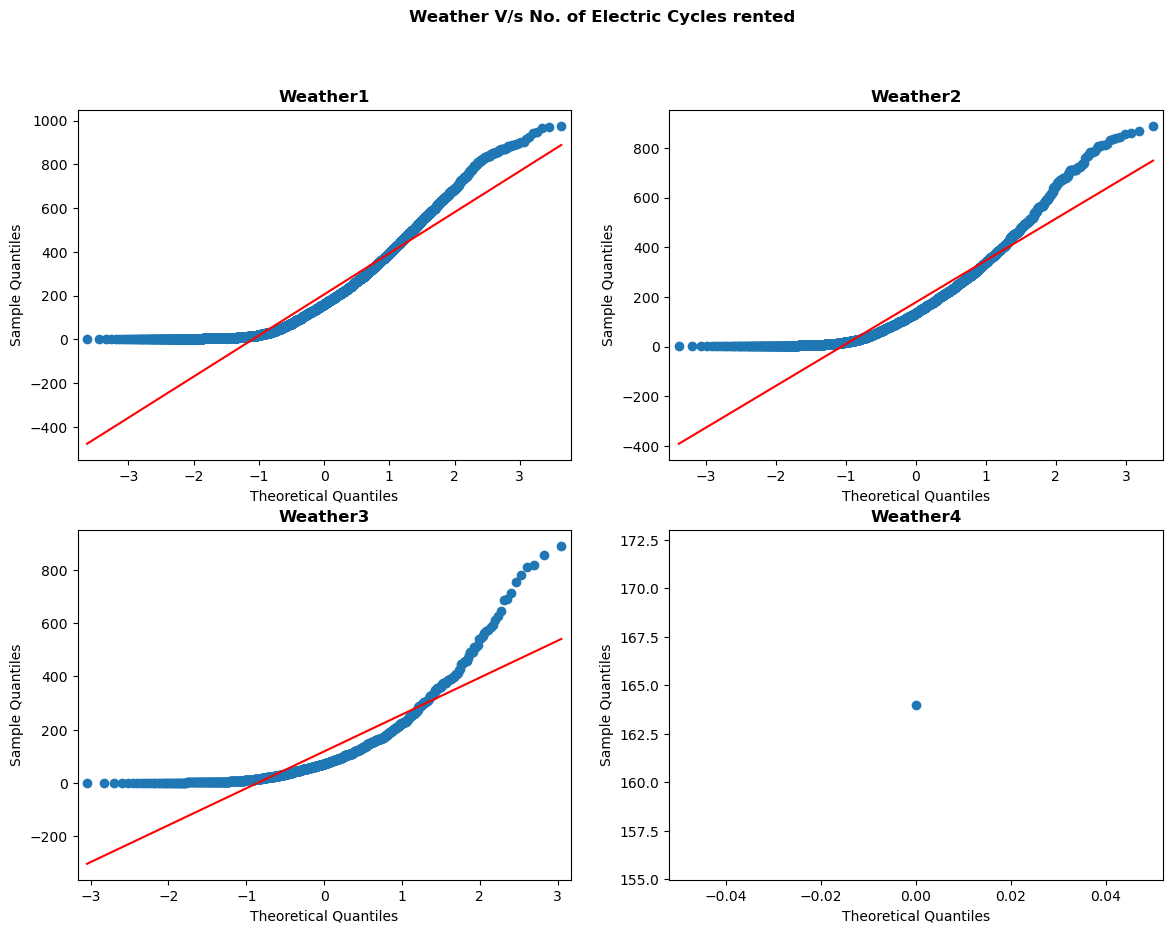

In [51]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
qqplot(weather1, line = 's', ax = axs[0][0])
axs[0][0].set_title("Weather1", fontweight = "bold")
qqplot(weather2, line = 's', ax = axs[0][1])
axs[0][1].set_title("Weather2", fontweight = "bold")
qqplot(weather3, line = 's', ax = axs[1][0])
axs[1][0].set_title("Weather3", fontweight = "bold")
qqplot(weather4, line = 's', ax = axs[1][1])
axs[1][1].set_title("Weather4", fontweight = "bold")
plt.suptitle("Weather V/s No. of Electric Cycles rented", fontweight = "bold")
plt.show()

In [52]:
Weather1 = []
for i in range(1000):
    a = weather1.sample(300).mean()
    Weather1.append(a)

In [53]:
Weather2 = []
for i in range(1000):
    a = weather2.sample(300).mean()
    Weather2.append(a)

In [54]:
Weather3 = []
for i in range(1000):
    a = weather3.sample(300).mean()
    Weather3.append(a)

In [55]:
Weather4 = []
for i in range(1000):
    a = weather4.mean()
    Weather4.append(a)

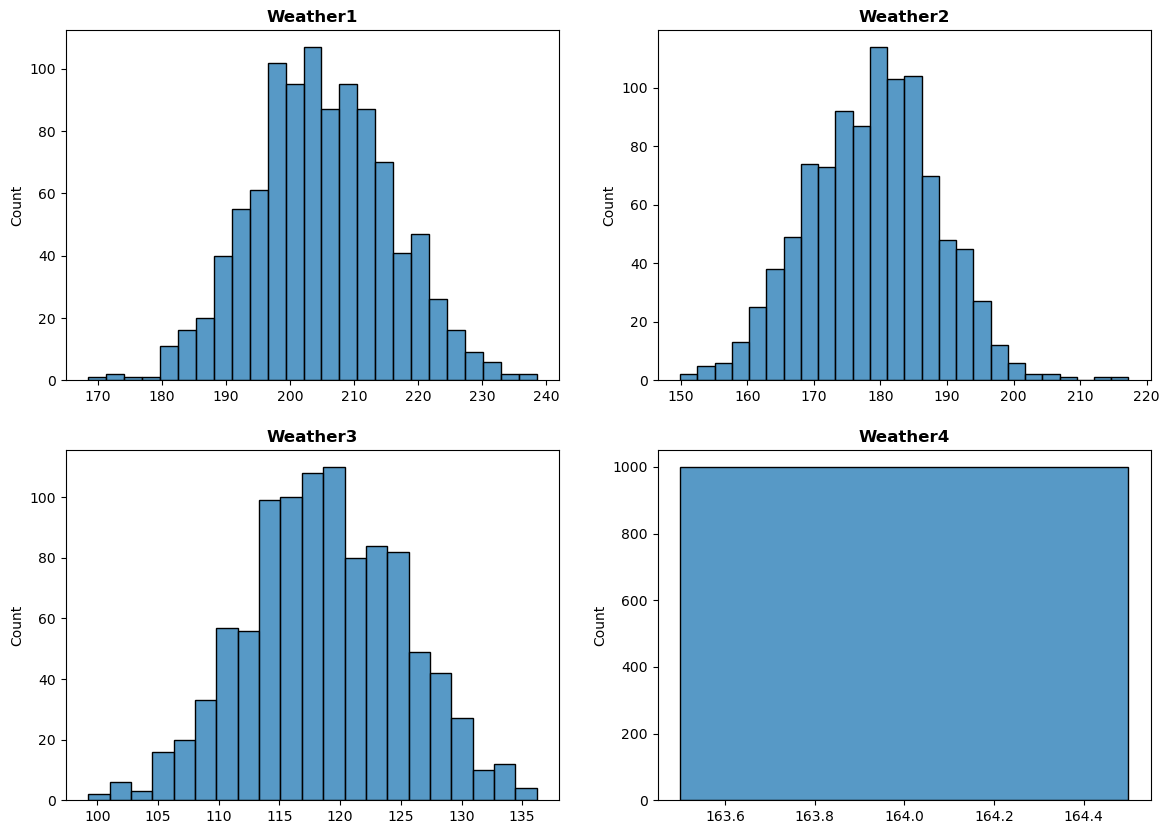

In [56]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
sns.histplot(Weather1, ax = axs[0][0]).set_title("Weather1", fontweight = "bold")
sns.histplot(Weather2, ax = axs[0][1]).set_title("Weather2", fontweight = "bold")
sns.histplot(Weather3, ax = axs[1][0]).set_title("Weather3", fontweight = "bold")
sns.histplot(Weather4, ax = axs[1][1]).set_title("Weather4", fontweight = "bold")
plt.show()

### Testing for homogeinity between samples

#### Null Hypothesis(H0): Working Day has no effect on number of electric cycles rented

#### Alternate Hypothesis(Ha): Working Day has effect on number of electric cycles rented

#### Keeping Significance level = 5%

In [57]:
alpha = 0.05
stat, p_val = levene(Weather1, Weather2, Weather3, Weather4)
print("P-Value: ",np.round(p_val, 3))
if p_val < alpha:
    print("Reject Null Hypothesis", "The variances are significantly different", sep = "\n")
else:
    print("Failed to reject Null Hypothesis", "The variances are not significantly different", sep = "\n")

P-Value:  0.0
Reject Null Hypothesis
The variances are significantly different


### Inference: The variances are significantly different

#### Assumptions:
- Data collected in different weather conditions is independent from each other.
- Population data is normal.(Here it is not normal so we have used a sample size greater than 30).
- There is homogeneity of variance.(Here, the variances are not exactly same but there is a little difference).

#### Null Hypothesis(H0): Weather has no significant effect on number of electric cycles rented
#### Alternate Hypothesis(Ha): Weather has a significant effect on number of electric cycles rented
#### Keeping Significance level = 5%

In [58]:
alpha = 0.05
stat, p_val = f_oneway(Weather1, Weather2, Weather3, Weather4)
print("T-stat: ", np.round(t_stat, 2))
print("P-value: ", np.round(p_val, 2))
if p_val < alpha:
    print("Reject Null Hypothesis")
    
else :
    print("Can't reject Null Hypothesis")

T-stat:  1.21
P-value:  0.0
Reject Null Hypothesis


#### Since weather 4 had just one record(shows clear unlikeliness of cycles getting rented on this particular type of weather), we can possible remove it from out consideration and consider the remaining three.

In [59]:
alpha = 0.05
stat, p_val = f_oneway(Weather1, Weather2, Weather3)
print("T-stat: ", np.round(t_stat, 2))
print("P-value: ", np.round(p_val, 2))
if p_val < alpha:
    print("Reject Null Hypothesis")
    
else :
    print("Can't reject Null Hypothesis")

T-stat:  1.21
P-value:  0.0
Reject Null Hypothesis


#### Inference: Weather conditions have a significant effect on the number of electric cycles getting rented

## Season V/s Weather

#### Since, weather and seasons are both categorical, we'll proceed with the chi-squared test

#### Assumptions:
- Both variables are categorical.
- All observations are independent.
- Cells in the contingency table are mutually exclusive.
- Expected value of cells should be 5 or greater in at least 80% of cells.

In [60]:
pd.crosstab(index = data["weather"], columns = data["season"])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


#### Eliminating weather number 4 

In [61]:
wtr_ssn = pd.crosstab(index = data[data["weather"]!=4]["weather"], columns = data["season"])
wtr_ssn

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


#### Null Hypothesis(H0): Weather is not significantly related to Season
#### Alternate Hypothesis(Ha): Weather is significantly related to Season
#### Keeping Significance level = 5%

In [62]:
alpha = 0.05
chi_stat, p_val, dof, exp_vals = chi2_contingency(wtr_ssn)
print("T-stat: ", np.round(chi_stat, 2))
print("P-value: ", np.round(p_val, 2))
print("Degree of freedom: ", dof)
print("Expected values:\n", exp_vals)
if p_val < alpha:
    print("Reject Null Hypothesis")
    
else :
    print("Can't reject Null Hypothesis")

T-stat:  46.1
P-value:  0.0
Degree of freedom:  6
Expected values:
 [[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]
Reject Null Hypothesis


#### Inference: Weather has a statistically significant relation with Season

# Inferences:

### Working Day has no significant effect on number of electric cycles rented
- Average number of cycles rented on working days is 193.01
- Average number of cycles rented on non-working days is 188.51

### Seasons have a significant effect on number of electric cycles rented
- Fall season has the highest average number of electric cycles(234.42).
- Summer season has the second highest number of electric cycles(215.25).
- Winter season has the third highest number of electric cycles(198.99).
- Spring season has the least average number of electric cycles(116.34).

### Weather conditions have a significant effect on the number of electric cycles getting rented
- Weather1 has the highest average number of electric cycles(205.24).
- Weather2 has the second highest average number of electric cycles(178.96).
- Weather3 has the third highest average number of electric cycles(	118.85).
- Weather4 has the least average number of electric cycles(164.00).

### Weather has a statistically significant relation with Season

# Recommendations:

- The bikes can be rotated as per seasons(More bikes need to be placed in areas experiencing shorter Fall and Summer Season).
- Operations must be limited in regions facing frequent snowfall, rains, thunderstorms, ice pallets and mist fog.
- Operations must be leveraged during the high demand months(June, July August).
- Time of around 5:00 PM, 6:00 PM and 8:00 AM are peak hours and have high demands(probably due to office, college timings). Therefore, more electric cycles must be deployed at centres nearby offices, colleges around these timezones.
- Appropriate measures must be taken to convert casual users to registered users.